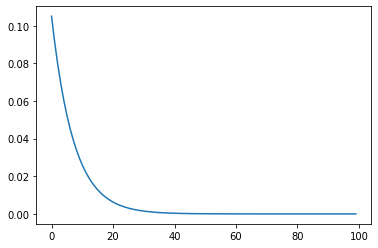

7.177176021564428e-08
[[0.5]
 [0.7]]


In [6]:
#First code
import numpy as np
import matplotlib.pyplot as plt

x  = np.array([[0.5],[0.7]])             # (1,2)
wh = np.array([[0.1,0.2],[0.3,0.4]])     # (2,2)
wo = np.array([[0.1,0.2]])               # (1,2)
r = 0.1
t = 0.5
c=np.zeros(100)
for i in range(len(c)):
    h_temp = wh@x
    h = 1/(1+np.exp(-h_temp))
    o = wo@h
    wo -= r*(o-t)*h.T
    wh -= r*(o-t)*wo*(1-h)*h*x
    c[i]= (o-t)**2
plt.plot(c)
plt.show()
print(c[-1])
print(x)

In [4]:
# Create traing secuence
import numpy as np
import matplotlib.pyplot as plt

N  = 100
X  = np.random.normal(0,1,[N,5])
wh = np.random.uniform(-0.5, 0.5, (5, 2))
wo = np.array([[0.1],[0.2]])
T  = np.zeros(N)
for i in range(N):
    x = np.array([X[i]])
    h_temp = x@wh
    h = 1/(1+np.exp(-h_temp))
    T[i] = h@wo

In [23]:
wh = np.random.uniform(-0.5, 0.5, (5, 2))
wo = np.array([[0.3],[0.6]])
r = 0.1
c=np.zeros(N)
for i in range(N):
    x = np.array([X[i]])
    t = T[i]
    h_temp = x@wh
    h = 1/(1+np.exp(-h_temp))
    o = h@wo
    wo -= r*(o-t)*h.T
    print(np.shape(wo))
    print(np.shape(x))
    
    print(np.shape(x@wo))
    #wh -= r*(o-t)*wo*(1-h)*h*x
    wh = wo.T@(o-t)#* (h * (1 - h))@x.T

    c[i]= (o-t)**2
plt.plot(c,'.')
plt.show()
print(c[-1])

(2, 1)
(1, 5)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 5)

In [113]:
from mnist import MNIST
mndata = MNIST('./data')
images, labels = mndata.load_training()
images = np.array(images)
labels = np.array(labels)
[n,m] = images.shape
print(n)

60000


(1, 784)


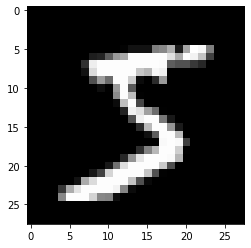

5

In [114]:
print(np.shape(np.array([images[0]])))
plt.imshow(images[0].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
plt.show()
labels[0]